### Logistic Regression

In [3]:
install.packages("corrplot")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library("corrplot")
library("ggplot2")

corrplot 0.92 loaded



In [5]:
# https://drive.google.com/file/d/1RKgpQobMIko8smA3f9yOfaqx3lomXDuX/view?usp=share_link

In [6]:
system("gdown --id 1RKgpQobMIko8smA3f9yOfaqx3lomXDuX")

In [48]:
df = read.csv("/content/mushroom.csv")

In [65]:
head(df)

,X,Class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,⋯,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,print,population,habitat
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,Poisonous,x,s,n,t,None,f,c,n,⋯,s,w,w,p,w,o,p,Buff,s,u
2,2,Edible,x,s,y,t,Almonds,f,c,b,⋯,s,w,w,p,w,o,p,Chocolate,n,g
3,3,Edible,b,s,w,t,Fishy,f,c,b,⋯,s,w,w,p,w,o,p,Chocolate,n,m
4,4,Poisonous,x,y,w,t,None,f,c,n,⋯,s,w,w,p,w,o,p,Buff,s,u
5,5,Edible,x,s,g,f,Musty,f,w,b,⋯,s,w,w,p,w,o,e,Chocolate,a,g
6,6,Edible,x,y,y,t,Almonds,f,c,b,⋯,s,w,w,p,w,o,p,Buff,n,g


In [50]:
tail(df)

,X,Class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,⋯,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,print,population,habitat
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
8119,8119,Poisonous,k,y,n,f,Creosote,f,c,n,⋯,s,p,w,p,w,o,e,White,v,d
8120,8120,Edible,k,s,n,f,Musty,a,c,b,⋯,s,o,o,p,o,o,p,Black,c,l
8121,8121,Edible,x,s,n,f,Musty,a,c,b,⋯,s,o,o,p,n,o,p,Black,v,l
8122,8122,Edible,f,s,n,f,Musty,a,c,b,⋯,s,o,o,p,o,o,p,Black,c,l
8123,8123,Poisonous,k,y,n,f,Spicy,f,c,n,⋯,k,w,w,p,w,o,e,White,v,l
8124,8124,Edible,x,s,n,f,Musty,a,c,b,⋯,s,o,o,p,o,o,p,Green,c,l


In [51]:
summary(df)

       X           Class            cap.shape         cap.surface       
 Min.   :   1   Length:8124        Length:8124        Length:8124       
 1st Qu.:2032   Class :character   Class :character   Class :character  
 Median :4062   Mode  :character   Mode  :character   Mode  :character  
 Mean   :4062                                                           
 3rd Qu.:6093                                                           
 Max.   :8124                                                           
  cap.color           bruises              odor           gill.attachment   
 Length:8124        Length:8124        Length:8124        Length:8124       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                           

In [52]:
str(df)

'data.frame':	8124 obs. of  24 variables:
 $ X                       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Class                   : chr  "Poisonous" "Edible" "Edible" "Poisonous" ...
 $ cap.shape               : chr  "x" "x" "b" "x" ...
 $ cap.surface             : chr  "s" "s" "s" "y" ...
 $ cap.color               : chr  "n" "y" "w" "w" ...
 $ bruises                 : chr  "t" "t" "t" "t" ...
 $ odor                    : chr  "None" "Almonds" "Fishy" "None" ...
 $ gill.attachment         : chr  "f" "f" "f" "f" ...
 $ gill.spacing            : chr  "c" "c" "c" "c" ...
 $ gill.size               : chr  "n" "b" "b" "n" ...
 $ gill.color              : chr  "k" "k" "n" "n" ...
 $ stalk.shape             : chr  "e" "e" "e" "e" ...
 $ stalk.root              : chr  "e" "c" "c" "e" ...
 $ stalk.surface.above.ring: chr  "s" "s" "s" "s" ...
 $ stalk.surface.below.ring: chr  "s" "s" "s" "s" ...
 $ stalk.color.above.ring  : chr  "w" "w" "w" "w" ...
 $ stalk.color.below.ring  : chr  "w" "w" "w" "

In [53]:
dim(df)

[1] 8124   24

In [54]:
# conver to numeric

In [66]:
data <- data.frame(sapply(df[3:24], function (x) as.numeric(as.factor(x))))

In [67]:
data$class = ifelse(df$Class == "Poisonous", 0, 1)

In [68]:
head(data)

,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,stalk.shape,⋯,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,print,population,habitat,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,3,5,2,7,2,1,2,5,1,⋯,8,8,1,3,2,5,3,4,6,0
2,6,3,10,2,1,2,1,1,5,1,⋯,8,8,1,3,2,5,4,3,2,1
3,1,3,9,2,4,2,1,1,6,1,⋯,8,8,1,3,2,5,4,3,4,1
4,6,4,9,2,7,2,1,2,6,1,⋯,8,8,1,3,2,5,3,4,6,0
5,6,3,4,1,6,2,2,1,5,2,⋯,8,8,1,3,2,1,4,1,2,1
6,6,4,10,2,1,2,1,1,6,1,⋯,8,8,1,3,2,5,3,3,2,1


In [13]:
# update.packages(ask=FALSE, checkBuilt=TRUE)
install.packages("Amelia")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppArmadillo’




In [14]:
library("Amelia")

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.1, built: 2022-11-18)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



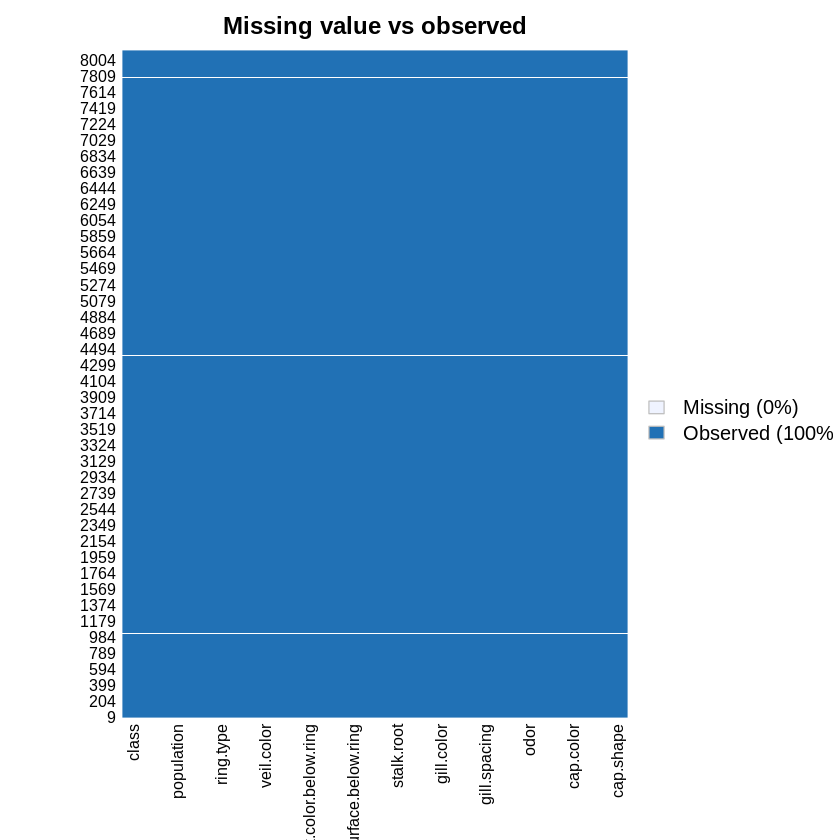

In [69]:
missmap(data, main="Missing value vs observed")

In [16]:
# no missing value

In [70]:
n = nrow(data)
trainIndex = sample(1:n, size = round(0.7*n), replace = F)

In [71]:
train = data[trainIndex, ]
test = data[-trainIndex, ]

In [72]:
print("Rows of training data and test data: ")
print(nrow(train))
print(nrow(test))

[1] "Rows of training data and test data: "
[1] 5687
[1] 2437


In [73]:
# build model with glm(formula, trainData, family)
logistic_regression = glm(class ~ ., data = train, family = "binomial")
print(summary(logistic_regression))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = class ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9100  -0.1250   0.0000   0.1343   5.2080  

Coefficients: (1 not defined because of singularities)
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                72.71763 1572.25964   0.046 0.963111    
cap.shape                  -0.01734    0.04469  -0.388 0.697921    
cap.surface                -0.30706    0.07616  -4.032 5.53e-05 ***
cap.color                   0.09982    0.03308   3.017 0.002551 ** 
bruises                    -2.63961    0.37576  -7.025 2.15e-12 ***
odor                        1.28416    0.08481  15.142  < 2e-16 ***
gill.attachment            33.72451  919.09275   0.037 0.970730    
gill.spacing               24.65727    1.20968  20.383  < 2e-16 ***
gill.size                 -22.80908    1.04929 -21.738  < 2e-16 ***
gill.color                  0.19563    0.03040   6.436 1.23e-10 ***
stalk.shape    

In [74]:
pred = predict(logistic_regression,
                newdata = test,
                type = "response")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


In [75]:
pred_value = ifelse(pred > 0.5, 1, 0)
print("Test data admit vs predict (10 rows): ")
result = data.frame(testAdmit = test$class[30:40], predict_value = pred_value[30:40])
print(result)

[1] "Test data admit vs predict (10 rows): "
    testAdmit predict_value
102         1             1
106         1             1
108         1             1
110         1             1
112         1             1
114         1             1
115         0             0
121         0             0
122         1             1
125         1             1
134         1             1


NX: Model hoat dong tot.

In [76]:
# solution 1
accuracy = table(pred_value, test[, "class"])
accuracy = sum(diag(accuracy)) / sum(accuracy)
print(paste("Accuracy solution 1: ", accuracy))

[1] "Accuracy solution 1:  0.97168649979483"


In [77]:
# Solution 2
misClasificError = mean(pred_value != test$class)
print(paste("Accuracy s2: ", 1-misClasificError))

[1] "Accuracy s2:  0.97168649979483"


In [78]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [79]:
library("caret")

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [82]:
cm = confusionMatrix(as.factor(pred_value), as.factor(test$class))
cm

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1139   37
         1   32 1229
                                          
               Accuracy : 0.9717          
                 95% CI : (0.9643, 0.9779)
    No Information Rate : 0.5195          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9433          
                                          
 Mcnemar's Test P-Value : 0.6301          
                                          
            Sensitivity : 0.9727          
            Specificity : 0.9708          
         Pos Pred Value : 0.9685          
         Neg Pred Value : 0.9746          
             Prevalence : 0.4805          
         Detection Rate : 0.4674          
   Detection Prevalence : 0.4826          
      Balanced Accuracy : 0.9717          
                                          
       'Positive' Class : 0               
                        

In [88]:
cm_d

Prediction,Reference,Freq
<fct>,<fct>,<int>
0,0,1139
1,0,32
0,1,37
1,1,1229


In [84]:
cm_d <- as.data.frame(cm$table)

In [96]:
plt1 <-  ggplot(data = cm_d, aes(x = Prediction , y =  Reference, fill = Freq))+
  scale_x_discrete(position = "top") +
  geom_tile( data = cm_d,aes(fill = Freq)) +
  scale_fill_gradient2(guide = FALSE ,low="red3",high="orchid4", midpoint = 0,na.value = 'white') +
  geom_text(aes(label = Freq), color = 'black', size = 3)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        legend.position = "none",
        panel.border = element_blank(),
        plot.background = element_blank(),
        axis.line = element_blank(),
        )

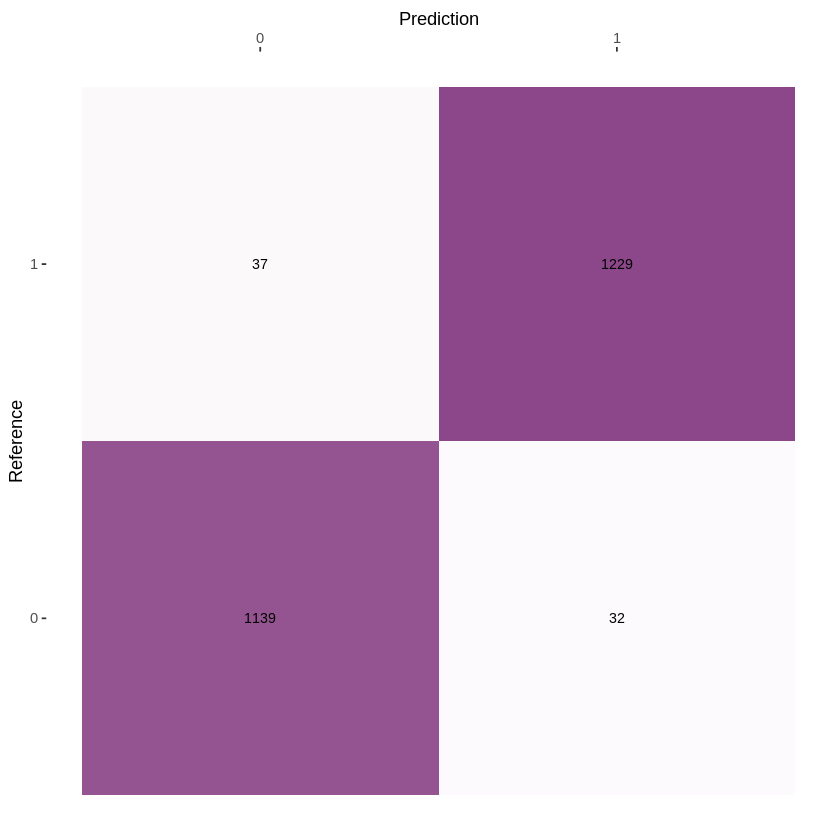

In [97]:
plt1

### Decision Tree

In [98]:
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [99]:
library("rpart")

In [101]:
tree = rpart(class ~ ., data = train, method = "class")

In [102]:
tree

n= 5687 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 5687 2745 1 (0.48267980 0.51732020)  
    2) gill.color< 4.5 2321  369 0 (0.84101680 0.15898320)  
      4) population>=4.5 1923   23 0 (0.98803952 0.01196048) *
      5) population< 4.5 398   52 1 (0.13065327 0.86934673)  
       10) print< 2.5 34    0 0 (1.00000000 0.00000000) *
       11) print>=2.5 364   18 1 (0.04945055 0.95054945) *
    3) gill.color>=4.5 3366  793 1 (0.23559121 0.76440879)  
      6) print< 2.5 481   56 0 (0.88357588 0.11642412)  
       12) odor< 4.5 425    0 0 (1.00000000 0.00000000) *
       13) odor>=4.5 56    0 1 (0.00000000 1.00000000) *
      7) print>=2.5 2885  368 1 (0.12755633 0.87244367)  
       14) gill.size>=1.5 466  152 0 (0.67381974 0.32618026)  
         28) stalk.shape< 1.5 404   90 0 (0.77722772 0.22277228)  
           56) habitat< 2.5 212    0 0 (1.00000000 0.00000000) *
           57) habitat>=2.5 192   90 0 (0.53125000 0.46875000)  
            114) bru

In [103]:
install.packages("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [104]:
library("rpart.plot")

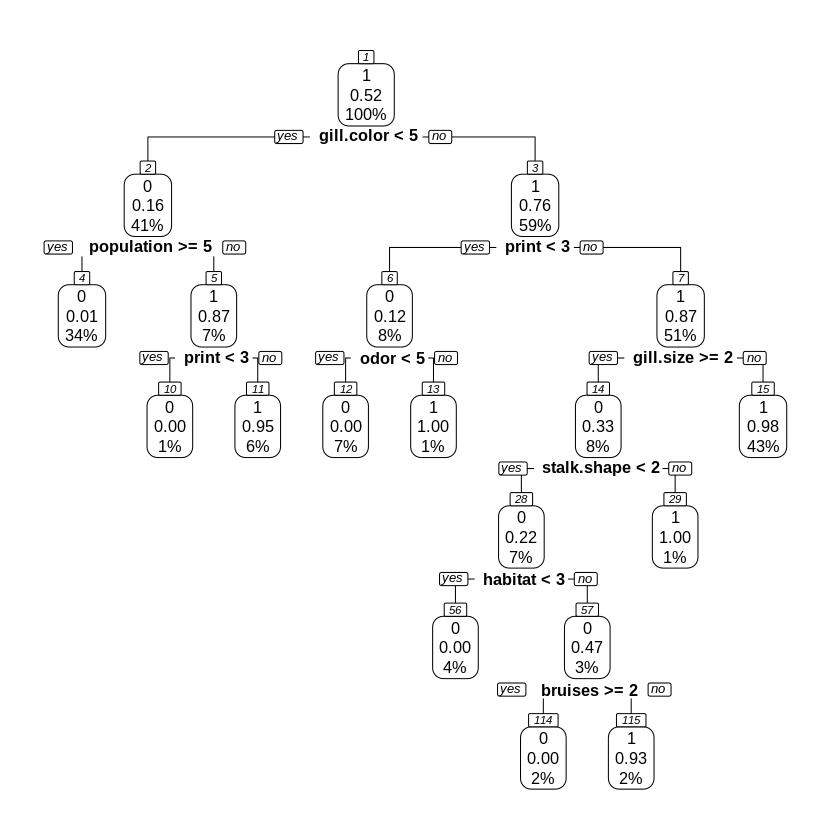

In [105]:
prp(tree, type = 2, extra = "auto", nn = T, branch = 1, varlen = 0, yesno = 2)

In [106]:
y_pred = predict(tree, test, type = 'class')


In [107]:
# accuracy
result = table(y_pred, test$class)
result

      
y_pred    0    1
     0 1134   13
     1   37 1253

In [108]:
acc = sum(diag(result))/sum(result)
acc


[1] 0.979483

NX: model co do chinh xac cao, cao hon so voi Logistic Regression

In [114]:
cm1 = confusionMatrix(as.factor(y_pred), as.factor(test$class))
cm1

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1134   13
         1   37 1253
                                         
               Accuracy : 0.9795         
                 95% CI : (0.973, 0.9847)
    No Information Rate : 0.5195         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9589         
                                         
 Mcnemar's Test P-Value : 0.001143       
                                         
            Sensitivity : 0.9684         
            Specificity : 0.9897         
         Pos Pred Value : 0.9887         
         Neg Pred Value : 0.9713         
             Prevalence : 0.4805         
         Detection Rate : 0.4653         
   Detection Prevalence : 0.4707         
      Balanced Accuracy : 0.9791         
                                         
       'Positive' Class : 0              
                                         

In [118]:
cm_d <- as.data.frame(cm1$table)

In [120]:
plt2 <-  ggplot(data = cm_d, aes(x = Prediction , y =  Reference, fill = Freq))+
  scale_x_discrete(position = "top") +
  geom_tile( data = cm_d,aes(fill = Freq)) +
  scale_fill_gradient2(guide = FALSE ,low="green",high="blue", midpoint = 0,na.value = 'white') +
  geom_text(aes(label = Freq), color = 'black', size = 3)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        legend.position = "none",
        panel.border = element_blank(),
        plot.background = element_blank(),
        axis.line = element_blank(),
        )

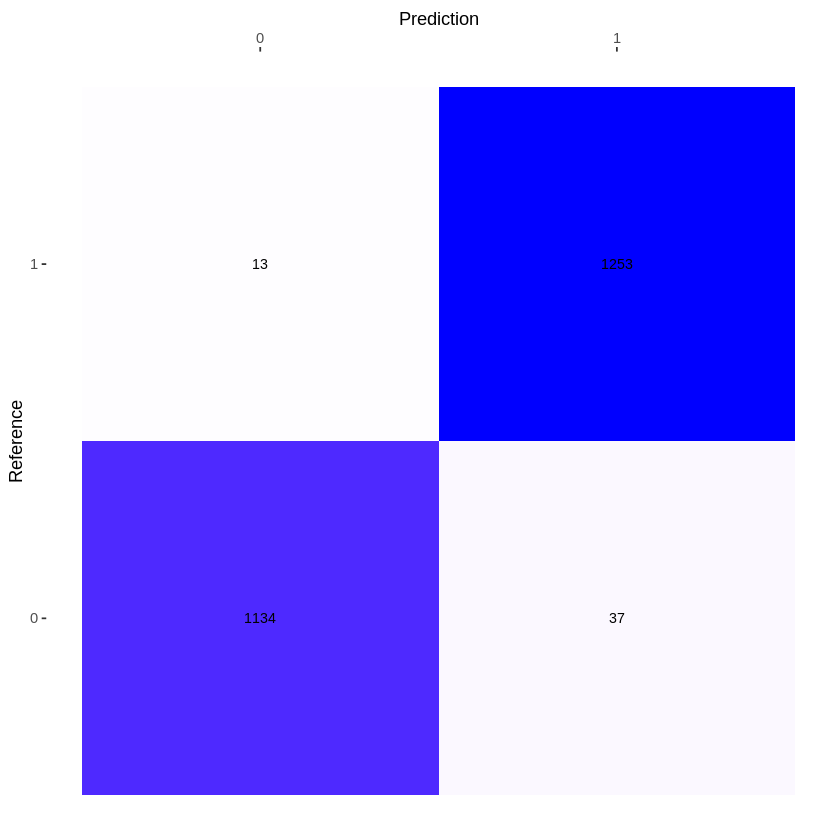

In [121]:
plt2

NX: su dung `Decision Tree` cho kq tot hon. Ly do: su dung dc cho cac mo hinh phi tuyen, va o day co nhieu cot, moi cot co mo ta khac nhau.